## Importing Necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import polars as pl
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import warnings 
warnings.filterwarnings("ignore", category = DeprecationWarning)

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/virtual-hackathon/sample_submission.csv
/kaggle/input/virtual-hackathon/train.csv
/kaggle/input/virtual-hackathon/test.csv


In [2]:
pl.Config(tbl_width_chars=1000)

In [3]:
#Read in the Data

train = pl.read_csv('/kaggle/input/virtual-hackathon/train.csv')
test = pl.read_csv('/kaggle/input/virtual-hackathon/test.csv')

In [4]:
df = pd.read_csv('/kaggle/input/virtual-hackathon/train.csv')

In [5]:
train.head()

Id,review,sentiment
i64,str,i64
0,"""I have done a …",1
1,"""One of the mos…",1
2,"""I was amazingl…",1
3,"""This film is s…",0
4,"""At last!! Sand…",1


In [6]:
with pl.Config(tbl_width_chars=5000):
    print(train.head(1))

shape: (1, 3)
┌─────┬───────────────────────────────────┬───────────┐
│ Id  ┆ review                            ┆ sentiment │
│ --- ┆ ---                               ┆ ---       │
│ i64 ┆ str                               ┆ i64       │
╞═════╪═══════════════════════════════════╪═══════════╡
│ 0   ┆ I have done a lot of internation… ┆ 1         │
└─────┴───────────────────────────────────┴───────────┘


In [7]:
train.head(2).glimpse()

Rows: 2
Columns: 3
$ Id        <i64> 0, 1
$ review    <str> 'I have done a lot of international travel, both on business and as a tourist. For both types I assure you the best advice is also the oldest: Always drink the wine of the country. In this movie the archangel Michael comes to Earth on business, wraps it up quickly and decides to hang around for a little touring. Boy! Does he "drink the wine of the country."<br /><br />Could man be drunk forever with liquor, love and fights <br /><br />He\'d lief rise up of mornings and lief lie down of nights.<br /><br />These are things you can\'t do in Heaven so he enjoys them while he\'s here! Of course it turns out he had a couple of other jobs to tackle and, if he is less direct about them than he was about the first one, he is just as successful. The final scene is a little schmaltzy but it is also wonderful. Jean Stapleton gets to dance with John Travolta.', "One of the most frightening game experiences ever that will make you keep the 

In [8]:
with pl.Config(fmt_str_lengths=2000):
    print(train.head(2))

shape: (2, 3)
┌─────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────────┐
│ Id  ┆ review                                                                                               

In [9]:
train.shape, test.shape

((35000, 3), (15000, 2))

In [10]:
train.columns

['Id', 'review', 'sentiment']

### Combine the Train and Test Dataset

In [11]:
#data = train.vstack(test)

In [12]:
#data.head(2).glimpse()

## Data Preprocessing

### Removing HTML Tags

In [13]:
# Removing HTML Tags

pattern = re.compile('<.*?>')

#result = re.sub(pattern, '', html_string)

#df['clean_review'] = re.sub(pattern, '', df['review'])

In [14]:
df.head()

,Id,review,sentiment
0,0,"I have done a lot of international travel, bot...",1
1,1,One of the most frightening game experiences e...,1
2,2,I was amazingly impressed by this movie. It co...,1
3,3,"This film is stale, and misses the mark. It is...",0
4,4,At last!! Sandra Bullock is indeed a beautiful...,1


In [15]:
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df['cleaned_review'] = df['review'].apply(lambda cw : remove_tags(cw))

print(df)

          Id                                             review  sentiment  \
0          0  I have done a lot of international travel, bot...          1   
1          1  One of the most frightening game experiences e...          1   
2          2  I was amazingly impressed by this movie. It co...          1   
3          3  This film is stale, and misses the mark. It is...          0   
4          4  At last!! Sandra Bullock is indeed a beautiful...          1   
...      ...                                                ...        ...   
34995  34995  Let me start by saying that Liev has gained a ...          1   
34996  34996  This has to be one of the, if not the worst mo...          0   
34997  34997  Atlantis was much better than I had anticipate...          1   
34998  34998  Elizabeth Ashley is receiving phone calls from...          1   
34999  34999  I recently started to watch this show in syndi...          1   

                                          cleaned_review  
0   

In [16]:
df.head()

,Id,review,sentiment,cleaned_review
0,0,"I have done a lot of international travel, bot...",1,"I have done a lot of international travel, bot..."
1,1,One of the most frightening game experiences e...,1,One of the most frightening game experiences e...
2,2,I was amazingly impressed by this movie. It co...,1,I was amazingly impressed by this movie. It co...
3,3,"This film is stale, and misses the mark. It is...",0,"This film is stale, and misses the mark. It is..."
4,4,At last!! Sandra Bullock is indeed a beautiful...,1,At last!! Sandra Bullock is indeed a beautiful...


In [17]:
tr = train.clone()

In [18]:
def remove_tags(string):
    result = re.sub('<.*?>', '', string)
    return result

tr = tr.with_columns(
    pl.col('review').apply(lambda cw : remove_tags(cw)).alias('cleaned_review')
)

with pl.Config(fmt_str_lengths = 2000):
    print(tr.head(2))

shape: (2, 4)
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [19]:
train = train.with_columns(
    pl.col('review').apply(lambda cw : remove_tags(cw)).alias('cleaned_review')
)

with pl.Config(fmt_str_lengths = 2000):
    print(train.head(2))

shape: (2, 4)
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [20]:
test = test.with_columns(
    pl.col('review').apply(lambda cw : remove_tags(cw)).alias('cleaned_review')
)

with pl.Config(fmt_str_lengths = 2000):
    print(train.head(2))

#test.head(2)

shape: (2, 4)
┌─────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬───────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [21]:
test.head(2).glimpse()

Rows: 2
Columns: 3
$ Id             <i64> 35000, 35001
$ review         <str> 'When I watched L\'Appartement with my girlfriend, she sighed: "How complicated!" And she is right, of course. When you are used to simple, one-linear plots, especially violent hero vs crook schemes, L\'Appartement is hard to follow. A couple of the negative reviewers here also have missed one or more important points. Other whine about the confusing flash backs. Come on! This is not the kind of movie from which you can leave to visit the toilet, come back and get hooked again within a few seconds. This one demands full concentration and a keen eye on details. Then it is really not that hard to figure out what\'s happening and when. The director has left more than enough clues in all scenes.<br /><br />The first 3/4 of the movie centers about the question: why did Max and Lisa split? The film, as my girlfriend remarked, begins as a romantic lovestory, suggesting that two lost lovers will find each other again

### Removing Punctuation, Numbers & Special Characters

In [22]:
tr = tr.with_columns(pl.col("cleaned_review").str.replace_all("[^a-zA-Z0-9#]", " "))

tr.select('cleaned_review').head(2).glimpse()
#^a-zA-Z0-9

#combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

Rows: 2
Columns: 1
$ cleaned_review <str> 'I have done a lot of international travel  both on business and as a tourist  For both types I assure you the best advice is also the oldest  Always drink the wine of the country  In this movie the archangel Michael comes to Earth on business  wraps it up quickly and decides to hang around for a little touring  Boy  Does he  drink the wine of the country  Could man be drunk forever with liquor  love and fights He d lief rise up of mornings and lief lie down of nights These are things you can t do in Heaven so he enjoys them while he s here  Of course it turns out he had a couple of other jobs to tackle and  if he is less direct about them than he was about the first one  he is just as successful  The final scene is a little schmaltzy but it is also wonderful  Jean Stapleton gets to dance with John Travolta ', 'One of the most frightening game experiences ever that will make you keep the lights on next to your bed  Great storyline with a romant

In [23]:
train = train.with_columns(pl.col("cleaned_review").str.replace_all("[^a-zA-Z0-9#]", " "))

test = test.with_columns(pl.col("cleaned_review").str.replace_all("[^a-zA-Z0-9#]", " "))

In [24]:
test.head(1).glimpse()

Rows: 1
Columns: 3
$ Id             <i64> 35000
$ review         <str> 'When I watched L\'Appartement with my girlfriend, she sighed: "How complicated!" And she is right, of course. When you are used to simple, one-linear plots, especially violent hero vs crook schemes, L\'Appartement is hard to follow. A couple of the negative reviewers here also have missed one or more important points. Other whine about the confusing flash backs. Come on! This is not the kind of movie from which you can leave to visit the toilet, come back and get hooked again within a few seconds. This one demands full concentration and a keen eye on details. Then it is really not that hard to figure out what\'s happening and when. The director has left more than enough clues in all scenes.<br /><br />The first 3/4 of the movie centers about the question: why did Max and Lisa split? The film, as my girlfriend remarked, begins as a romantic lovestory, suggesting that two lost lovers will find each other again. Havin

In [25]:
train.head(2).glimpse()

Rows: 2
Columns: 4
$ Id             <i64> 0, 1
$ review         <str> 'I have done a lot of international travel, both on business and as a tourist. For both types I assure you the best advice is also the oldest: Always drink the wine of the country. In this movie the archangel Michael comes to Earth on business, wraps it up quickly and decides to hang around for a little touring. Boy! Does he "drink the wine of the country."<br /><br />Could man be drunk forever with liquor, love and fights <br /><br />He\'d lief rise up of mornings and lief lie down of nights.<br /><br />These are things you can\'t do in Heaven so he enjoys them while he\'s here! Of course it turns out he had a couple of other jobs to tackle and, if he is less direct about them than he was about the first one, he is just as successful. The final scene is a little schmaltzy but it is also wonderful. Jean Stapleton gets to dance with John Travolta.', "One of the most frightening game experiences ever that will make you

### Removing Stop_Words

In [26]:
stop_words = stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
tweet = train.row(2)[3]

tweet

'I was amazingly impressed by this movie  It contained fundamental elements of depression  grief  loneliness  despair  hope  dreams and companionship  It wasn t merely about a genius musician who hit rock bottom but it was about a man caught up in grief trying drastically to find solace within his music  He finds a companion who comes with her own issues  Claire and Des were able to provide each other with friendship and love but more importantly a conclusion to events which had shaped their life for the worst  Des is an unlikely character by todays standards of a rock star  Yet he has musical genius  He also has an event in his past that has made him stagnate  while things around him literally go to ruins  His focus is creating his Whale Music  in fact it becomes an obsession for him Claire is the streetwise kid that needs a place to stay  She finds hidden talents while being in Des company  She also finds a mutual friend that accepts her  She learns to trust him over a period of time

In [28]:
tweet

'I was amazingly impressed by this movie  It contained fundamental elements of depression  grief  loneliness  despair  hope  dreams and companionship  It wasn t merely about a genius musician who hit rock bottom but it was about a man caught up in grief trying drastically to find solace within his music  He finds a companion who comes with her own issues  Claire and Des were able to provide each other with friendship and love but more importantly a conclusion to events which had shaped their life for the worst  Des is an unlikely character by todays standards of a rock star  Yet he has musical genius  He also has an event in his past that has made him stagnate  while things around him literally go to ruins  His focus is creating his Whale Music  in fact it becomes an obsession for him Claire is the streetwise kid that needs a place to stay  She finds hidden talents while being in Des company  She also finds a mutual friend that accepts her  She learns to trust him over a period of time

In [29]:
print('Before Removing Stopwords')
print(tweet)


tweets_tokens = []

for word in tweet: # Go through every word in your tokens list
    if (word not in stop_words):
        tweets_tokens.append(word)

print('\n\nAfter removing stop words:')
print(tweets_tokens)

Before Removing Stopwords
I was amazingly impressed by this movie  It contained fundamental elements of depression  grief  loneliness  despair  hope  dreams and companionship  It wasn t merely about a genius musician who hit rock bottom but it was about a man caught up in grief trying drastically to find solace within his music  He finds a companion who comes with her own issues  Claire and Des were able to provide each other with friendship and love but more importantly a conclusion to events which had shaped their life for the worst  Des is an unlikely character by todays standards of a rock star  Yet he has musical genius  He also has an event in his past that has made him stagnate  while things around him literally go to ruins  His focus is creating his Whale Music  in fact it becomes an obsession for him Claire is the streetwise kid that needs a place to stay  She finds hidden talents while being in Des company  She also finds a mutual friend that accepts her  She learns to trust 

In [30]:
fruits = ['mango', 'orange', 'bana', 'pine', 'apple', 'hm', 'hmm', 'hmmm', 'oh', 'ohh', 'ohhhh']

fruits.remove('mango')

print(fruits)

['orange', 'bana', 'pine', 'apple', 'hm', 'hmm', 'hmmm', 'oh', 'ohh', 'ohhhh']


In [31]:
for i in stop_words:
    if i == "hmmm":
        stop_words.remove(i)
    elif i == "ohhh":
        stop_words.remove(i)

In [32]:
tr.head(2)

Id,review,sentiment,cleaned_review
i64,str,i64,str
0,"""I have done a …",1,"""I have done a …"
1,"""One of the mos…",1,"""One of the mos…"


In [33]:
tr.head(2).glimpse()

Rows: 2
Columns: 4
$ Id             <i64> 0, 1
$ review         <str> 'I have done a lot of international travel, both on business and as a tourist. For both types I assure you the best advice is also the oldest: Always drink the wine of the country. In this movie the archangel Michael comes to Earth on business, wraps it up quickly and decides to hang around for a little touring. Boy! Does he "drink the wine of the country."<br /><br />Could man be drunk forever with liquor, love and fights <br /><br />He\'d lief rise up of mornings and lief lie down of nights.<br /><br />These are things you can\'t do in Heaven so he enjoys them while he\'s here! Of course it turns out he had a couple of other jobs to tackle and, if he is less direct about them than he was about the first one, he is just as successful. The final scene is a little schmaltzy but it is also wonderful. Jean Stapleton gets to dance with John Travolta.', "One of the most frightening game experiences ever that will make you

In [34]:
tr.select('cleaned_review').head(2).glimpse()

Rows: 2
Columns: 1
$ cleaned_review <str> 'I have done a lot of international travel  both on business and as a tourist  For both types I assure you the best advice is also the oldest  Always drink the wine of the country  In this movie the archangel Michael comes to Earth on business  wraps it up quickly and decides to hang around for a little touring  Boy  Does he  drink the wine of the country  Could man be drunk forever with liquor  love and fights He d lief rise up of mornings and lief lie down of nights These are things you can t do in Heaven so he enjoys them while he s here  Of course it turns out he had a couple of other jobs to tackle and  if he is less direct about them than he was about the first one  he is just as successful  The final scene is a little schmaltzy but it is also wonderful  Jean Stapleton gets to dance with John Travolta ', 'One of the most frightening game experiences ever that will make you keep the lights on next to your bed  Great storyline with a romant

In [35]:
# tr = tr.with_columns(pl.col('cleaned_review'))

# for word in tweet_tokens: # Go through every word in your tokens list
#     if (word not in stop_words):
#         tweets_clean.append(word)

# tr = tr.with_columns(
#     pl.col('review').apply(lambda cw : remove_tags(cw)).alias('cleaned_review')
# )

# new_words = word_tokenize(new_text)

# # Remove stopwords using NLTK
# new_filtered_words = [
#     word for word in new_words if word.lower() not in stopwords.words('english')]
 
# # Join the filtered words to form a clean text
# new_clean_text = ' '.join(new_filtered_words)

#tr = tr.with_columns(pl.col('cleaned_review').apply(lambda x: x.split()))

#tr = tr.with_columns(pl.col('cleaned_review').apply(lambda x: ' '.join([word for word in x.str.split(',') if word not in (stop_words)])))

#tr = tr.with_columns(pl.col('cleaned_review').apply(lambda x: ' '.join([word for word in x.split(',') if word not in (stop_words)])))


#map_batches, map_elements

#tr = tr.with_columns(pl.col('cleaned_review').map_elements(lambda x: ' '.join([word for word in x.split(' ') if word not in (stop_words)])))
tr = tr.with_columns(pl.col('cleaned_review').map_elements(lambda x: ' '.join([word for word in x.lower().split(' ') if word not in (stop_words)])))

In [36]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [37]:
t = tr.row(2)[3]

t

'amazingly impressed movie  contained fundamental elements depression  grief  loneliness  despair  hope  dreams companionship  merely genius musician hit rock bottom man caught grief trying drastically find solace within music  finds companion comes issues  claire des able provide friendship love importantly conclusion events shaped life worst  des unlikely character todays standards rock star  yet musical genius  also event past made stagnate  things around literally go ruins  focus creating whale music  fact becomes obsession claire streetwise kid needs place stay  finds hidden talents des company  also finds mutual friend accepts  learns trust period time two find love one another  mind blowing  sex infused kind passion  love friendship understanding means  two people hurt  find trust together '

In [38]:
tr.select('cleaned_review').head(2).glimpse()

Rows: 2
Columns: 1
$ cleaned_review <str> 'done lot international travel  business tourist  types assure best advice also oldest  always drink wine country  movie archangel michael comes earth business  wraps quickly decides hang around little touring  boy   drink wine country  could man drunk forever liquor  love fights lief rise mornings lief lie nights things heaven enjoys  course turns couple jobs tackle  less direct first one  successful  final scene little schmaltzy also wonderful  jean stapleton gets dance john travolta ', 'one frightening game experiences ever make keep lights next bed  great storyline romantic  horrific  ironic plot  fans original resident evil surprise returning character  mention voice acting drastically improved previous series  miss best series '



In [39]:
train = train.with_columns(pl.col('cleaned_review').map_elements(lambda x: ' '.join([word for word in x.lower().split(' ') if word not in (stop_words)])))


test = test.with_columns(pl.col('cleaned_review').map_elements(lambda x: ' '.join([word for word in x.lower().split(' ') if word not in (stop_words)])))

### Tokenization

In [40]:
tweet = train.row(2)[3]

tweet

'amazingly impressed movie  contained fundamental elements depression  grief  loneliness  despair  hope  dreams companionship  merely genius musician hit rock bottom man caught grief trying drastically find solace within music  finds companion comes issues  claire des able provide friendship love importantly conclusion events shaped life worst  des unlikely character todays standards rock star  yet musical genius  also event past made stagnate  things around literally go ruins  focus creating whale music  fact becomes obsession claire streetwise kid needs place stay  finds hidden talents des company  also finds mutual friend accepts  learns trust period time two find love one another  mind blowing  sex infused kind passion  love friendship understanding means  two people hurt  find trust together '

In [41]:
print('Before Tokenizing: ')
print(tweet)

# instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, 
                           reduce_len=True)

# tokenize the tweets
tweet_tokens = tokenizer.tokenize(tweet)

print('\nTokenized string:')
print(tweet_tokens)

Before Tokenizing: 
amazingly impressed movie  contained fundamental elements depression  grief  loneliness  despair  hope  dreams companionship  merely genius musician hit rock bottom man caught grief trying drastically find solace within music  finds companion comes issues  claire des able provide friendship love importantly conclusion events shaped life worst  des unlikely character todays standards rock star  yet musical genius  also event past made stagnate  things around literally go ruins  focus creating whale music  fact becomes obsession claire streetwise kid needs place stay  finds hidden talents des company  also finds mutual friend accepts  learns trust period time two find love one another  mind blowing  sex infused kind passion  love friendship understanding means  two people hurt  find trust together 

Tokenized string:
['amazingly', 'impressed', 'movie', 'contained', 'fundamental', 'elements', 'depression', 'grief', 'loneliness', 'despair', 'hope', 'dreams', 'companions

In [42]:
tr.select(['review', 'cleaned_review']).head(2).glimpse()

Rows: 2
Columns: 2
$ review         <str> 'I have done a lot of international travel, both on business and as a tourist. For both types I assure you the best advice is also the oldest: Always drink the wine of the country. In this movie the archangel Michael comes to Earth on business, wraps it up quickly and decides to hang around for a little touring. Boy! Does he "drink the wine of the country."<br /><br />Could man be drunk forever with liquor, love and fights <br /><br />He\'d lief rise up of mornings and lief lie down of nights.<br /><br />These are things you can\'t do in Heaven so he enjoys them while he\'s here! Of course it turns out he had a couple of other jobs to tackle and, if he is less direct about them than he was about the first one, he is just as successful. The final scene is a little schmaltzy but it is also wonderful. Jean Stapleton gets to dance with John Travolta.', "One of the most frightening game experiences ever that will make you keep the lights on next to 

In [43]:
def tweet_tokenizer(tweet):
    result = tokenizer.tokenize(tweet)
    return result
    
#tr = tr.with_columns(pl.col('cleaned_review').apply(lambda x: tweet_tokenizer(x)))

In [44]:
tr = tr.with_columns(pl.col('cleaned_review').apply(lambda x: x.split()))

#tr.select('cleaned_review').head(2).glimpse()

In [45]:
#train = train.with_columns(pl.col('cleaned_review').apply(lambda x: tweet_tokenizer(x)))
train = train.with_columns(pl.col('cleaned_review').apply(lambda x: x.split()))

#test = test.with_columns(pl.col('cleaned_review').apply(lambda x: tweet_tokenizer(x)))
test = test.with_columns(pl.col('cleaned_review').apply(lambda x: x.split()))

In [46]:
train.select('cleaned_review').head(2).glimpse()

Rows: 2
Columns: 1
$ cleaned_review <list[str]> ['done', 'lot', 'international', 'travel', 'business', 'tourist', 'types', 'assure', 'best', 'advice', 'also', 'oldest', 'always', 'drink', 'wine', 'country', 'movie', 'archangel', 'michael', 'comes', 'earth', 'business', 'wraps', 'quickly', 'decides', 'hang', 'around', 'little', 'touring', 'boy', 'drink', 'wine', 'country', 'could', 'man', 'drunk', 'forever', 'liquor', 'love', 'fights', 'lief', 'rise', 'mornings', 'lief', 'lie', 'nights', 'things', 'heaven', 'enjoys', 'course', 'turns', 'couple', 'jobs', 'tackle', 'less', 'direct', 'first', 'one', 'successful', 'final', 'scene', 'little', 'schmaltzy', 'also', 'wonderful', 'jean', 'stapleton', 'gets', 'dance', 'john', 'travolta'], ['one', 'frightening', 'game', 'experiences', 'ever', 'make', 'keep', 'lights', 'next', 'bed', 'great', 'storyline', 'romantic', 'horrific', 'ironic', 'plot', 'fans', 'original', 'resident', 'evil', 'surprise', 'returning', 'character', 'mention', 'voice', 'acti

In [47]:
test.select('cleaned_review').head(2).glimpse()

Rows: 2
Columns: 1
$ cleaned_review <list[str]> ['watched', 'l', 'appartement', 'girlfriend', 'sighed', 'complicated', 'right', 'course', 'used', 'simple', 'one', 'linear', 'plots', 'especially', 'violent', 'hero', 'vs', 'crook', 'schemes', 'l', 'appartement', 'hard', 'follow', 'couple', 'negative', 'reviewers', 'also', 'missed', 'one', 'important', 'points', 'whine', 'confusing', 'flash', 'backs', 'come', 'kind', 'movie', 'leave', 'visit', 'toilet', 'come', 'back', 'get', 'hooked', 'within', 'seconds', 'one', 'demands', 'full', 'concentration', 'keen', 'eye', 'details', 'really', 'hard', 'figure', 'happening', 'director', 'left', 'enough', 'clues', 'scenes', 'first', '3', '4', 'movie', 'centers', 'question', 'max', 'lisa', 'split', 'film', 'girlfriend', 'remarked', 'begins', 'romantic', 'lovestory', 'suggesting', 'two', 'lost', 'lovers', 'find', 'experience', 'french', 'movies', 'predicted', 'story', 'pretty', 'soon', 'would', 'get', 'sick', 'twist', 'right', 'end', 'first', 'part', '

### Stemming

In [48]:
ps = PorterStemmer()

tr = tr.with_columns(pl.col('cleaned_review').map_elements(lambda x: [ps.stem(i) for i in x]))

tr.select('cleaned_review').head(2).glimpse()

Rows: 2
Columns: 1
$ cleaned_review <list[str]> ['done', 'lot', 'intern', 'travel', 'busi', 'tourist', 'type', 'assur', 'best', 'advic', 'also', 'oldest', 'alway', 'drink', 'wine', 'countri', 'movi', 'archangel', 'michael', 'come', 'earth', 'busi', 'wrap', 'quickli', 'decid', 'hang', 'around', 'littl', 'tour', 'boy', 'drink', 'wine', 'countri', 'could', 'man', 'drunk', 'forev', 'liquor', 'love', 'fight', 'lief', 'rise', 'morn', 'lief', 'lie', 'night', 'thing', 'heaven', 'enjoy', 'cours', 'turn', 'coupl', 'job', 'tackl', 'less', 'direct', 'first', 'one', 'success', 'final', 'scene', 'littl', 'schmaltzi', 'also', 'wonder', 'jean', 'stapleton', 'get', 'danc', 'john', 'travolta'], ['one', 'frighten', 'game', 'experi', 'ever', 'make', 'keep', 'light', 'next', 'bed', 'great', 'storylin', 'romant', 'horrif', 'iron', 'plot', 'fan', 'origin', 'resid', 'evil', 'surpris', 'return', 'charact', 'mention', 'voic', 'act', 'drastic', 'improv', 'previou', 'seri', 'miss', 'best', 'seri']



In [49]:
train = train.with_columns(pl.col('cleaned_review').map_elements(lambda x: [ps.stem(i) for i in x]))


test = test.with_columns(pl.col('cleaned_review').map_elements(lambda x: [ps.stem(i) for i in x]))

In [50]:
train.select('cleaned_review').head(2).glimpse()

Rows: 2
Columns: 1
$ cleaned_review <list[str]> ['done', 'lot', 'intern', 'travel', 'busi', 'tourist', 'type', 'assur', 'best', 'advic', 'also', 'oldest', 'alway', 'drink', 'wine', 'countri', 'movi', 'archangel', 'michael', 'come', 'earth', 'busi', 'wrap', 'quickli', 'decid', 'hang', 'around', 'littl', 'tour', 'boy', 'drink', 'wine', 'countri', 'could', 'man', 'drunk', 'forev', 'liquor', 'love', 'fight', 'lief', 'rise', 'morn', 'lief', 'lie', 'night', 'thing', 'heaven', 'enjoy', 'cours', 'turn', 'coupl', 'job', 'tackl', 'less', 'direct', 'first', 'one', 'success', 'final', 'scene', 'littl', 'schmaltzi', 'also', 'wonder', 'jean', 'stapleton', 'get', 'danc', 'john', 'travolta'], ['one', 'frighten', 'game', 'experi', 'ever', 'make', 'keep', 'light', 'next', 'bed', 'great', 'storylin', 'romant', 'horrif', 'iron', 'plot', 'fan', 'origin', 'resid', 'evil', 'surpris', 'return', 'charact', 'mention', 'voic', 'act', 'drastic', 'improv', 'previou', 'seri', 'miss', 'best', 'seri']



In [51]:
test.select('cleaned_review').head(2).glimpse()

Rows: 2
Columns: 1
$ cleaned_review <list[str]> ['watch', 'l', 'appart', 'girlfriend', 'sigh', 'complic', 'right', 'cours', 'use', 'simpl', 'one', 'linear', 'plot', 'especi', 'violent', 'hero', 'vs', 'crook', 'scheme', 'l', 'appart', 'hard', 'follow', 'coupl', 'neg', 'review', 'also', 'miss', 'one', 'import', 'point', 'whine', 'confus', 'flash', 'back', 'come', 'kind', 'movi', 'leav', 'visit', 'toilet', 'come', 'back', 'get', 'hook', 'within', 'second', 'one', 'demand', 'full', 'concentr', 'keen', 'eye', 'detail', 'realli', 'hard', 'figur', 'happen', 'director', 'left', 'enough', 'clue', 'scene', 'first', '3', '4', 'movi', 'center', 'question', 'max', 'lisa', 'split', 'film', 'girlfriend', 'remark', 'begin', 'romant', 'lovestori', 'suggest', 'two', 'lost', 'lover', 'find', 'experi', 'french', 'movi', 'predict', 'stori', 'pretti', 'soon', 'would', 'get', 'sick', 'twist', 'right', 'end', 'first', 'part', 'becom', 'clear', 'mani', 'twist', 'turn', 'max', 'lisa', 'manipul', 'alic', 'max', 

In [52]:
tr.select('cleaned_review').head(2).glimpse()

Rows: 2
Columns: 1
$ cleaned_review <list[str]> ['done', 'lot', 'intern', 'travel', 'busi', 'tourist', 'type', 'assur', 'best', 'advic', 'also', 'oldest', 'alway', 'drink', 'wine', 'countri', 'movi', 'archangel', 'michael', 'come', 'earth', 'busi', 'wrap', 'quickli', 'decid', 'hang', 'around', 'littl', 'tour', 'boy', 'drink', 'wine', 'countri', 'could', 'man', 'drunk', 'forev', 'liquor', 'love', 'fight', 'lief', 'rise', 'morn', 'lief', 'lie', 'night', 'thing', 'heaven', 'enjoy', 'cours', 'turn', 'coupl', 'job', 'tackl', 'less', 'direct', 'first', 'one', 'success', 'final', 'scene', 'littl', 'schmaltzi', 'also', 'wonder', 'jean', 'stapleton', 'get', 'danc', 'john', 'travolta'], ['one', 'frighten', 'game', 'experi', 'ever', 'make', 'keep', 'light', 'next', 'bed', 'great', 'storylin', 'romant', 'horrif', 'iron', 'plot', 'fan', 'origin', 'resid', 'evil', 'surpris', 'return', 'charact', 'mention', 'voic', 'act', 'drastic', 'improv', 'previou', 'seri', 'miss', 'best', 'seri']



## Feature Extraction

### Needed Libraries

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

### Bag-of-Words

In [60]:
tr_bow = train.clone()

In [61]:
ts_bow = test.clone()

In [62]:
tr_bow.select('cleaned_review').head(2)

cleaned_review
list[str]
"[""done"", ""lot"", … ""travolta""]"
"[""one"", ""frighten"", … ""seri""]"


In [63]:
ts_bow.select('cleaned_review').head(2)

cleaned_review
list[str]
"[""watch"", ""l"", … ""beauti""]"
"[""work"", ""memori"", … ""experi""]"


In [64]:
## Bag-of-words Trial 1

#bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words='english', lowercase = False)

bow_vectorizer = CountVectorizer(max_features = 1000)

bow_vectorizer

# bag-of-words feature matrix
#bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

CountVectorizer(max_features=1000)

In [65]:
#Syntax for Joining words after tokeniation

tr_bow = tr_bow.with_columns(pl.col('cleaned_review').map_elements(lambda x: ' '.join(word for word in x)))

ts_bow = ts_bow.with_columns(pl.col('cleaned_review').map_elements(lambda x: ' '.join(word for word in x)))

In [66]:
tr_bow.select('cleaned_review').head()

cleaned_review
str
"""done lot inter…"
"""one frighten g…"
"""amazingli impr…"
"""film stale mis…"
"""last sandra bu…"


In [67]:
#Making each row an element in a list using list comprehension

e = [row['cleaned_review'] for row in tr_bow.iter_rows(named=True)]


e_ = [row['cleaned_review'] for row in ts_bow.iter_rows(named=True)]

In [68]:
e[:3]

['done lot intern travel busi tourist type assur best advic also oldest alway drink wine countri movi archangel michael come earth busi wrap quickli decid hang around littl tour boy drink wine countri could man drunk forev liquor love fight lief rise morn lief lie night thing heaven enjoy cours turn coupl job tackl less direct first one success final scene littl schmaltzi also wonder jean stapleton get danc john travolta',
 'one frighten game experi ever make keep light next bed great storylin romant horrif iron plot fan origin resid evil surpris return charact mention voic act drastic improv previou seri miss best seri',
 'amazingli impress movi contain fundament element depress grief loneli despair hope dream companionship mere geniu musician hit rock bottom man caught grief tri drastic find solac within music find companion come issu clair de abl provid friendship love importantli conclus event shape life worst de unlik charact today standard rock star yet music geniu also event pas

In [69]:
bow = bow_vectorizer.fit_transform(e)

# def bow(word):
#     #word = [word for i in word]
#     result = bow_vectorizer.fit_transform(word)
#     return result

#tr_bow = tr_bow.with_columns(pl.col('cleaned_review').map_elements(lambda x: [bow_vectorizer.fit_transform(i) for i in [x]]))


#tr_bow = tr_bow.with_columns(pl.col('cleaned_review').map_elements(lambda x: [bow_vectorizer.fit_transform(i) for i in [x]]))


#test = test.with_columns(pl.col('cleaned_review').map_elements(lambda x: [ps.stem(i) for i in x]))
#df_bow = pd.DataFrame(bow.todense())

#df_bow

bow_ts = bow_vectorizer.fit_transform(e_)

In [70]:
bow.todense().shape, bow_ts.todense().shape

((35000, 1000), (15000, 1000))

In [73]:
len(bow_vectorizer.get_feature_names_out())

1000

In [74]:
#tr_bow = tr_bow.with_columns(pl.col('cleaned_review').map_elements(lambda x: ' '.join(word for word in x)))


#r = [','.join(e)]

#counter

# x = 0

# for row in tr_bow.iter_rows():
#     x+=1
#     y = [','.join(x)]
# y



In [75]:
# from sklearn.feature_extraction.text import CountVectorizer

# bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# # bag-of-words feature matrix
# bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

# df_bow = pd.DataFrame(bow.todense())

# df_bow


#bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features=1000, stop_words = 'english')

#test = test.with_columns(pl.col('cleaned_review').map_elements(lambda x: [ps.stem(i) for i in x]))

#test.with_columns(pl.col('cleaned_review').apply(lambda x: x.split()))
# bag-of-words feature matrix

#clea
#bow = bow_vectorizer.fit_transform(pl.col(['cleaned_review']))

#tr_bow = tr_bow.with_columns(pl.col('cleaned_review').map_elements(lambda x: [bow_vectorizer.fit_transform(i) for i in x]))

#bow = bow_vectorizer.fit_transform(tr.select('cleaned_review'))

In [76]:
bow.shape

(35000, 1000)

In [77]:
train_bow = bow.todense()

test_bow = bow_ts.todense()

test_bow

matrix([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]])

In [78]:
train_bow

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [120]:
train_df = pl.DataFrame(train_bow)

test_df = pl.DataFrame(test_bow)

### TF-IDF Vectorizer

## Building Basic ML Models

In [97]:
from sklearn.metrics import f1_score

In [121]:
from sklearn.model_selection import train_test_split

x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_df, train.select('sentiment'), test_size=0.2, random_state = 2)

x_train_bow.shape, x_valid_bow.shape, y_train_bow.shape, y_valid_bow.shape, test_bow.shape

((28000, 1000), (7000, 1000), (28000, 1), (7000, 1), (15000, 1000))

In [124]:
y_valid_bow.head()

sentiment
i64
1
0
0
0
1


### Using Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

Log_Reg = LogisticRegression(random_state=0, solver='lbfgs')

In [122]:
Log_Reg.fit(x_train_bow, y_train_bow)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [125]:
prediction_bow = Log_Reg.predict(x_valid_bow)

prediction_bow

array([1, 0, 0, ..., 0, 0, 1])

In [126]:
len(y_valid_bow), len(prediction_bow)

(7000, 7000)

In [127]:
#Calculating F1 Score

# # if prediction is greater than or equal to 0.3 than 1 else 0
# # Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
# prediction_int = prediction_bow[:,1]>=0.3

# # converting the results to integer type
# prediction_int = prediction_int.astype(np.int)
# prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_bow)

log_bow

0.8666385016194902

### Using XGBoost


In [128]:
from xgboost import XGBClassifier

model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

model_bow = model_bow.fit(x_train_bow, y_train_bow)

In [136]:
# Prediction

xgb = model_bow.predict(x_valid_bow)

xgb

array([1, 0, 0, ..., 0, 0, 1])

In [134]:
xgb.shape

(7000,)

In [137]:
#Calculating F1 Score

# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
# xgb=xgb[:1]>=0.3

# # converting the results to integer type
# xgb_int=xgb.astype(int)

# calculating f1 score
xgb_bow = f1_score(y_valid_bow, xgb)

xgb_bow

0.8440237355185082

### Using Decision Trees

In [138]:
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [139]:
dct.fit(x_train_bow, y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [140]:
dct_bow = dct.predict(x_valid_bow)

dct_bow

array([1, 0, 0, ..., 0, 1, 1])

In [141]:
# calculating f1 score
dct_score_bow=f1_score(y_valid_bow, dct_bow)

dct_score_bow

0.7145931984502799

### Model Comparison of Basic Algorithms

In [142]:
Algorithm = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

score_1 = [log_bow, xgb_bow, dct_score_bow]

compare_1 = pd.DataFrame({'Model':Algorithm,'F1_Score':score_1},index=[i for i in range(1,4)])

compare_1.T

,1,2,3
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words)
F1_Score,0.866639,0.844024,0.714593


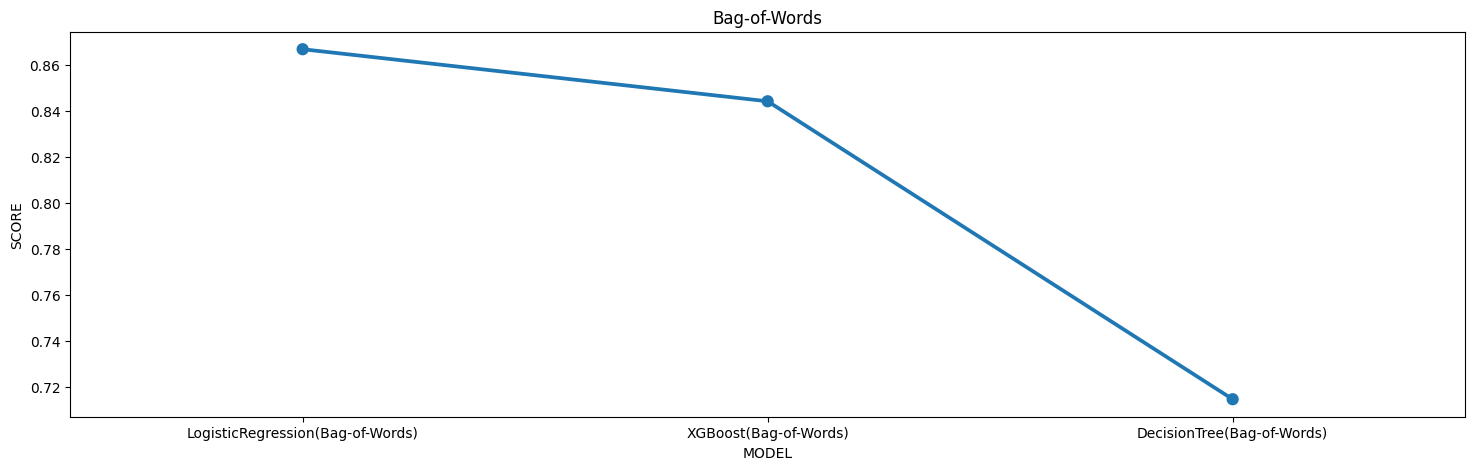

In [143]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

### Building Vocabulary

In [96]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm

## Two Ideas
<li>
Create a Vocab from the feature_names in Count Vectorizer
</li>

<li>
Build a vocab from scratch by implementing the vocab from the list of raw tokens in the train dataset.
</li>

In [94]:
tr.head()

Id,review,sentiment,cleaned_review
i64,str,i64,list[str]
0,"""I have done a …",1,"[""done"", ""lot"", … ""travolta""]"
1,"""One of the mos…",1,"[""one"", ""frighten"", … ""seri""]"
2,"""I was amazingl…",1,"[""amazingli"", ""impress"", … ""togeth""]"
3,"""This film is s…",0,"[""film"", ""stale"", … ""10""]"
4,"""At last!! Sand…",1,"[""last"", ""sandra"", … ""bye""]"


In [ ]:
def tokenize_example(example, tokenizer, max_length):
    tokens = tokenizer(example["text"])[:max_length]
    return {"tokens": tokens}

In [ ]:


min_freq = 5
special_tokens = ["<unk>", "<pad>"]

vocab = torchtext.vocab.build_vocab_from_iterator(
    train_data["tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

## Building the Model

### Splitting the Dataset into Train and Validation Dataset

In [80]:
# Labels DataFrame to Numpy Series
sentiment = train.select('sentiment').to_numpy()

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [87]:
from sklearn.model_selection import train_test_split

x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow, sentiment, test_size=0.2, random_state = 2)

x_train_bow.shape, x_valid_bow.shape, y_train_bow.shape, y_valid_bow.shape, test_bow.shape

### **Create DataLoader Objects for Pytorch Model**

In [89]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data = TensorDataset(torch.FloatTensor(x_train_bow), torch.FloatTensor(y_train_bow))
valid_data = TensorDataset(torch.FloatTensor(x_valid_bow), torch.FloatTensor(y_valid_bow))
#test_data = TensorDataset(torch.FloatTensor(test_bow), torch.FloatTensor(test_y))

#dataloader
batch_size=50
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
#test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [92]:
# Obtain one batch of training data

dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y[:10])